In [144]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import json

In [145]:
result_path = "./eval_result.jsonl"

result_list = []
with open(result_path, "r") as fr:
    for line in fr.readlines():
        result_list.append(json.loads(line))

In [146]:
prompts = [x["prompt"] for x in result_list]

openai_gen = [x["openai_result"]["generation"] for x in result_list]
openai_prob = [x["openai_result"]["prob"] for x in result_list]
openai_prob_list = [x["openai_result"]["prob_list"] for x in result_list]
openai_ppls = [x["openai_result"]["ppls"] for x in result_list]

base_gen = [x["base_result"]["generation"] for x in result_list]
base_prob = [x["base_result"]["prob"] for x in result_list]
base_prob_list = [x["base_result"]["prob_list"][::-1] for x in result_list]
base_ppls = [x["base_result"]["ppls"] for x in result_list]

watermarked_gen = [x["watermarked_result"]["generation"] for x in result_list]
watermarked_prob = [x["watermarked_result"]["prob"] for x in result_list]
watermarked_prob_list = [x["watermarked_result"]["prob_list"] for x in result_list]
watermarked_ppls = [x["watermarked_result"]["ppls"] for x in result_list]

openai_attack_gen = [x["openai_attack_result"]["generation"] for x in result_list]
openai_attack_prob = [x["openai_attack_result"]["prob"] for x in result_list]
openai_attack_prob_list = [x["openai_attack_result"]["prob_list"] for x in result_list]
openai_attack_ppls = [x["openai_attack_result"]["ppls"] for x in result_list]

In [147]:
weighted_openai_prob = [max(x[int(0.2*len(x)):]) for x in openai_prob_list]
weighted_base_prob = [max(x[int(0.2*len(x)):]) for x in base_prob_list]
weighted_watermarked_prob = [max(x[int(0.2*len(x)):]) for x in watermarked_prob_list]
weighted_openai_attack_prob = [max(x[int(0.2*len(x)):]) for x in openai_attack_prob_list]

df = pd.DataFrame({
    "openai_prob": openai_prob,
    # "weighted_openai_prob": weighted_openai_prob,
    "base_prob": base_prob,
    # "weighted_base_prob": weighted_base_prob,
    "watermarked_prob": watermarked_prob,
    # "weighted_watermarked_prob": weighted_watermarked_prob,
    "openai_attack_prob": openai_attack_prob,
    # "weighted_openai_attack_prob": weighted_openai_attack_prob,
})
display(df)

,openai_prob,base_prob,watermarked_prob,openai_attack_prob
0,0.493446,0.178684,0.799198,0.166481
1,0.218154,0.140155,0.906451,0.427924
2,0.281576,0.082285,0.849088,0.263993
3,0.583613,0.097966,0.735487,0.149386
4,0.176078,0.138511,0.305497,0.080097
5,0.391410,0.123513,0.603149,0.198374
6,0.471275,0.485159,0.264822,0.153919
7,0.206767,0.116874,0.580660,0.102370
8,0.626996,0.223103,0.901449,0.256031
9,0.398950,0.880786,0.858385,0.111030


auroc: 0.8956916099773242
auprc: 0.8009919664903347
------------------------------------------------------------
auroc: 0.623015873015873
auprc: 0.6790683411891055
------------------------------------------------------------
auroc: 0.35034013605442177
auprc: 0.264198076047408
------------------------------------------------------------
auroc: 0.9319727891156463
auprc: 0.8902280191492835
------------------------------------------------------------


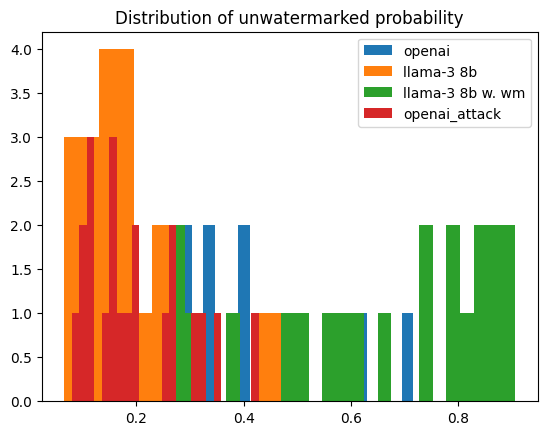

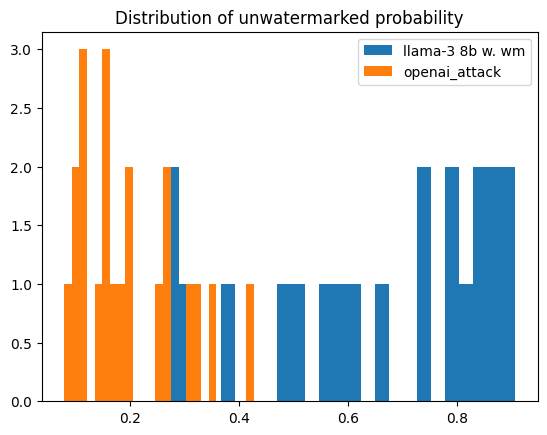

In [148]:
from sklearn.metrics import roc_auc_score, average_precision_score
prob = np.array(openai_prob + base_prob + watermarked_prob)
prob[np.isnan(prob)] = 0
label = np.array([0] * (len(openai_prob + base_prob)) + [1] * len(watermarked_prob))
auroc = roc_auc_score(label, prob)
print(f"auroc: {auroc}")
auprc = average_precision_score(label, prob)
print(f"auprc: {auprc}")
print("---"*20)

prob = np.array(openai_prob + base_prob + watermarked_prob + openai_attack_prob)
label = np.array([0] * (len(openai_prob + base_prob)) + [1] * len(watermarked_prob + openai_attack_prob))
prob[np.isnan(prob)] = 0
auroc = roc_auc_score(label, prob)
print(f"auroc: {auroc}")
auprc = average_precision_score(label, prob)
print(f"auprc: {auprc}")
print("---"*20)

prob = np.array(openai_prob + base_prob + openai_attack_prob)
label = np.array([0] * (len(openai_prob + base_prob)) + [1] * len(openai_attack_prob))
prob[np.isnan(prob)] = 0
auroc = roc_auc_score(label, prob)
print(f"auroc: {auroc}")
auprc = average_precision_score(label, prob)
print(f"auprc: {auprc}")
print("---"*20)

prob = np.array(base_prob + watermarked_prob)
label = np.array([0] * len(base_prob) + [1] * len(watermarked_prob))
prob[np.isnan(prob)] = 0
auroc = roc_auc_score(label, prob)
print(f"auroc: {auroc}")
auprc = average_precision_score(label, prob)
print(f"auprc: {auprc}")
print("---"*20)

fig, ax = plt.subplots()
ax.hist(openai_prob, bins=25, label="openai")
ax.hist(base_prob, bins=25, label="llama-3 8b")
ax.hist(watermarked_prob, bins=25, label="llama-3 8b w. wm")
ax.hist(openai_attack_prob, bins=25, label="openai_attack")
ax.legend()
plt.title("Distribution of unwatermarked probability")
plt.show()

fig, ax = plt.subplots()
# ax.hist(openai_prob, bins=25, label="openai")
# ax.hist(base_prob, bins=25, label="llama-3 8b")
ax.hist(watermarked_prob, bins=25, label="llama-3 8b w. wm")
ax.hist(openai_attack_prob, bins=25, label="openai_attack")
ax.legend()
plt.title("Distribution of unwatermarked probability")
plt.show()

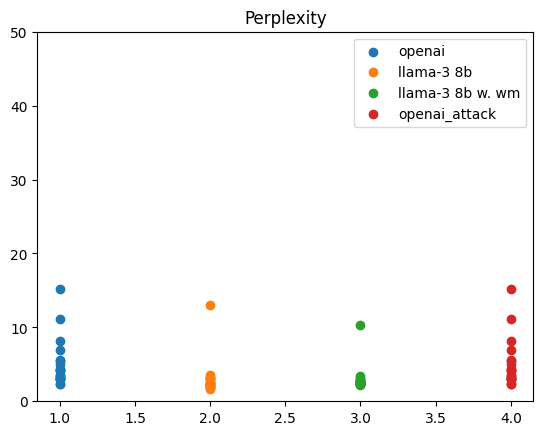

In [149]:
fig, ax = plt.subplots()
ax.scatter([1]*len(openai_ppls), openai_ppls, label="openai")
ax.scatter([2]*len(base_ppls), base_ppls, label="llama-3 8b")
ax.scatter([3]*len(watermarked_ppls), watermarked_ppls, label="llama-3 8b w. wm")
ax.scatter([4]*len(openai_attack_ppls), openai_ppls, label="openai_attack")
ax.set_ylim([0, 50])
ax.legend()

plt.title("Perplexity")
plt.show()